## Question: Oxygen results do not match CTD sensor data, why???

## Answer: Wrong units - ml/l bottle data was being compared to mg/l sensor data

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family ='Segoe UI Symbol')
plt.rcParams['figure.figsize'] = [9, 12]

In [39]:
bottle_oxygen = pd.read_csv(r"C:\Users\she384\Downloads\mac_harbour_oxygens.csv")

In [54]:
bottle_oxygen

,Survey,Stn,RP,Date_Sampled,Bottle,FlaskVol,RawTitre,Titre20,O2ml/L,ThioTemp,DrawTemp,EndVolts,TitreTime,O2µmol/L,Depth,O2mg/L
0,hob2019,1,17329,17-Dec-19,888,141.97,0.83032,0.82984,6.604,22.77,15,3.913,130022,294.60444,5,9.434276
1,hob2019,1,17328,17-Dec-19,891,139.55,0.36563,0.36540,2.950,22.89,15,2.731,130655,131.59950,15,4.214282
2,hob2019,1,17327,17-Dec-19,893,142.54,0.14235,0.14226,1.115,22.89,15,2.607,131138,49.74015,30,1.592856


## Convert bottle oxygen result from mL/L to mg/L (can multiply by 1.42857)

In [40]:
bottle_oxygen['O2mg/L'] = [x * 1.42857 for x in list(bottle_oxygen['O2ml/L'])]

In [91]:
bottle_oxygen['Salinity'] = [4.9583, 26.5853, 29.917]

In [95]:
bottle_oxygen['corr_Depth'] = [3.5, 13.5, 28.5]

In [41]:
seabird_sensor_191210 = pd.read_csv(r"C:\Users\she384\Downloads\Seabird_PM_20191210.csv")

In [53]:
seabird_sensor_191210.head()

,Date,Time,Conductivity,DO_mg/L,DO_%,SAL_PSU,Temperature,Depth,PAR,Chl_ug/L,Turbidity,Flag,stage,Sensor_package
0,12/10/2019,11:49:23 PM,0.440491,8.8286,87.088,0.0076,14.7537,0.032,487.68,0.0029,0.0970,0,downcast,Seabird
1,12/10/2019,11:49:24 PM,0.440491,8.8289,87.088,0.0076,14.7520,0.031,500.62,0.0273,0.1077,0,downcast,Seabird
2,12/10/2019,11:49:25 PM,0.410298,8.8385,87.178,0.0076,14.7497,0.032,528.09,0.0258,0.1550,0,downcast,Seabird
3,12/10/2019,11:49:26 PM,0.410298,8.8248,87.039,0.0076,14.7476,0.031,555.20,0.0281,0.0802,0,downcast,Seabird
4,12/10/2019,11:49:27 PM,0.410298,8.8312,87.085,0.0076,14.7385,0.032,650.54,0.0235,0.1275,0,downcast,Seabird


In [42]:
csiro_exo_191210 = pd.read_csv(r"C:\Users\she384\Downloads\191210_CSIRO_PM1.csv")

In [55]:
csiro_exo_191210.head()

,Date,Time,Temperature,Pressure,DO_%,DO_mg/L,SPC_uS/cm,SAL_PSU,pH,NTU,TSS_mg/L,BGA_PE_RFU,BGA_PE_ug/L,Chl_RFU,Chl_ug/L,fDOM_RFU,fDOM_ppb,Depth,stage,Sensor_package
0,12/10/2019,7:11:05,11.973,763.5,99.7,10.68,2364,1.22,7.10,2.31,0,3.907,11.35,0.816,3.33,26.134,79.37,0.125,downcast,EXO2
1,12/10/2019,7:11:06,12.010,763.6,100.0,10.70,2362,1.22,7.10,2.30,0,3.998,11.60,0.834,3.40,26.126,79.34,0.128,downcast,EXO2
2,12/10/2019,7:11:07,12.044,763.6,100.3,10.71,2359,1.22,7.09,2.26,0,4.054,11.76,0.860,3.50,26.118,79.32,0.133,downcast,EXO2
3,12/10/2019,7:11:08,12.082,763.5,100.5,10.73,2357,1.22,7.09,2.31,0,4.121,11.95,0.887,3.61,26.110,79.29,0.136,downcast,EXO2
4,12/10/2019,7:11:09,12.116,763.5,100.8,10.76,2355,1.22,7.08,2.29,0,4.172,12.10,0.907,3.69,26.110,79.30,0.139,downcast,EXO2


In [43]:
csiro_exo_191211 = pd.read_csv(r"C:\Users\she384\Downloads\191211_CSIRO_PM2.csv")

In [56]:
csiro_exo_191211.head()

,Date,Time,Temperature,Pressure,DO_%,DO_mg/L,SPC_uS/cm,SAL_PSU,pH,NTU,TSS_mg/L,BGA_PE_RFU,BGA_PE_ug/L,Chl_RFU,Chl_ug/L,fDOM_RFU,fDOM_ppb,Depth,stage,Sensor_package
0,12/11/2019,9:45:04,13.831,763.6,100.9,10.44,82.3,0.04,6.67,5.21,0,-1.673,-4.46,-0.196,-0.74,-0.704,-1.37,0.115,downcast,EXO2
1,12/11/2019,9:45:05,13.846,763.6,101.0,10.45,5905.0,3.23,7.22,1.31,0,-1.108,-2.86,-0.068,-0.23,0.447,2.09,0.116,downcast,EXO2
2,12/11/2019,9:45:06,13.865,763.7,101.1,10.25,5911.0,3.23,7.22,1.23,0,-0.666,-1.60,0.056,0.27,21.448,65.27,0.139,downcast,EXO2
3,12/11/2019,9:45:07,13.878,763.7,101.2,10.25,5910.0,3.23,7.21,1.57,0,-0.302,-0.58,0.181,0.78,21.394,65.11,0.164,downcast,EXO2
4,12/11/2019,9:45:08,13.896,763.7,101.3,10.26,5906.0,3.23,7.21,1.27,0,-0.004,0.27,0.307,1.28,21.507,65.45,0.189,downcast,EXO2


Text(0.5, 1.0, 'Bottle Oxygen Unit Comparison')

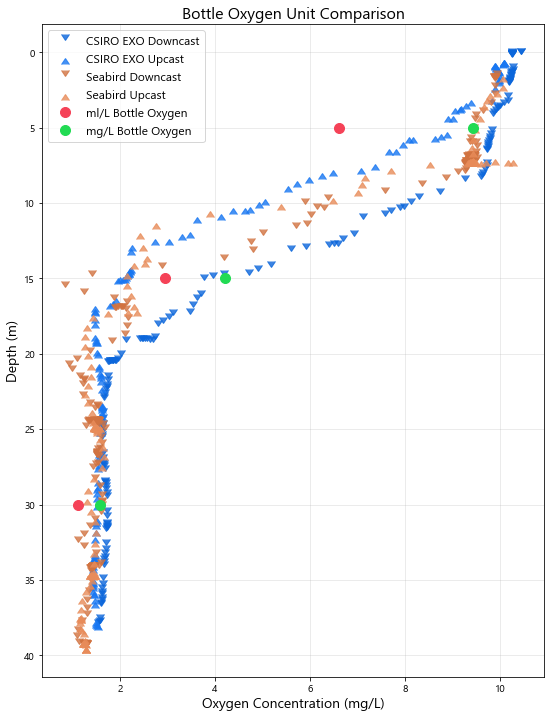

In [108]:
plt.plot(csiro_exo_191211['DO_mg/L'].loc[csiro_exo_191211['stage']=='downcast'], 
         csiro_exo_191211['Depth'].loc[csiro_exo_191211['stage']=='downcast'], 
         lw=0, marker=7, alpha=0.8, label = 'CSIRO EXO Downcast', color='#0b66db', ms=8)

plt.plot(csiro_exo_191211['DO_mg/L'].loc[csiro_exo_191211['stage']=='upcast'], 
         csiro_exo_191211['Depth'].loc[csiro_exo_191211['stage']=='upcast'], 
         lw=0, marker=6, alpha=0.8, label='CSIRO EXO Upcast', color='#1877f2', ms=8)

plt.plot(seabird_sensor_191210['DO_mg/L'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='downcast')], 
         seabird_sensor_191210['Depth'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='downcast')],
         lw=0, marker=7, alpha=0.8, label = 'Seabird Downcast', color='#d17341', ms=8)

plt.plot(seabird_sensor_191210['DO_mg/L'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='upcast')], 
         seabird_sensor_191210['Depth'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='upcast')],
         lw=0, marker=6, alpha=0.8, label = 'Seabird Upcast', color='#e88c5a', ms=8)

plt.plot(bottle_oxygen['O2ml/L'], bottle_oxygen['Depth'], lw=0, marker='o', label='ml/L Bottle Oxygen', color='#f54257', ms=10)
plt.plot(bottle_oxygen['O2mg/L'], bottle_oxygen['Depth'], lw=0, marker='o', label='mg/L Bottle Oxygen', color='#21db53', ms=10)

plt.grid(alpha=0.3, zorder=-1)
plt.gca().invert_yaxis()
plt.legend(fontsize=12)
plt.xlabel('Oxygen Concentration (mg/L)', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
plt.title('Bottle Oxygen Unit Comparison', fontsize=16)
#plt.savefig('C:/Users/she384/Downloads/plot_for_ruth.png', dpi=300)

## Converting the units to mg/l made a big difference for improving bottle~sensor comparibility 

## Still bit of inconsistency - look at Salinity to see if same offset issues

Text(0.5, 1.0, 'Bottle Salinity to Sensor Comparison')

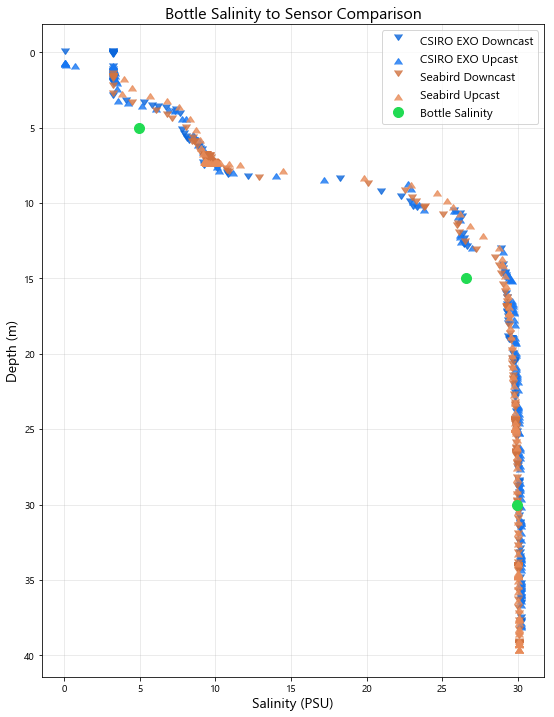

In [110]:
plt.plot(csiro_exo_191211['SAL_PSU'].loc[csiro_exo_191211['stage']=='downcast'], 
         csiro_exo_191211['Depth'].loc[csiro_exo_191211['stage']=='downcast'], 
         lw=0, marker=7, alpha=0.8, label = 'CSIRO EXO Downcast', color='#0b66db', ms=8)

plt.plot(csiro_exo_191211['SAL_PSU'].loc[csiro_exo_191211['stage']=='upcast'], 
         csiro_exo_191211['Depth'].loc[csiro_exo_191211['stage']=='upcast'], 
         lw=0, marker=6, alpha=0.8, label='CSIRO EXO Upcast', color='#1877f2', ms=8)

plt.plot(seabird_sensor_191210['SAL_PSU'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='downcast')], 
         seabird_sensor_191210['Depth'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='downcast')],
         lw=0, marker=7, alpha=0.8, label = 'Seabird Downcast', color='#d17341', ms=8)

plt.plot(seabird_sensor_191210['SAL_PSU'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='upcast')], 
         seabird_sensor_191210['Depth'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='upcast')],
         lw=0, marker=6, alpha=0.8, label = 'Seabird Upcast', color='#e88c5a', ms=8)

plt.plot(bottle_oxygen['Salinity'], bottle_oxygen['Depth'], lw=0, marker='o', label='Bottle Salinity', color='#21db53', ms=10)

plt.grid(alpha=0.3, zorder=-1)
plt.gca().invert_yaxis()
plt.legend(fontsize=12)
plt.xlabel('Salinity (PSU)', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
plt.title('Bottle Salinity to Sensor Comparison', fontsize=16)
#plt.savefig('C:/Users/she384/Downloads/plot_for_ruth.png', dpi=300)

### Quite a offset from the bottle data to the sensor. Could be due to depth, apply crude offset to shift data and see how that looks? Weather was pretty crappy when sampled - so swell pushing boat up and down would influence sampled depth

#### Rough offset of negative 1.5m applied

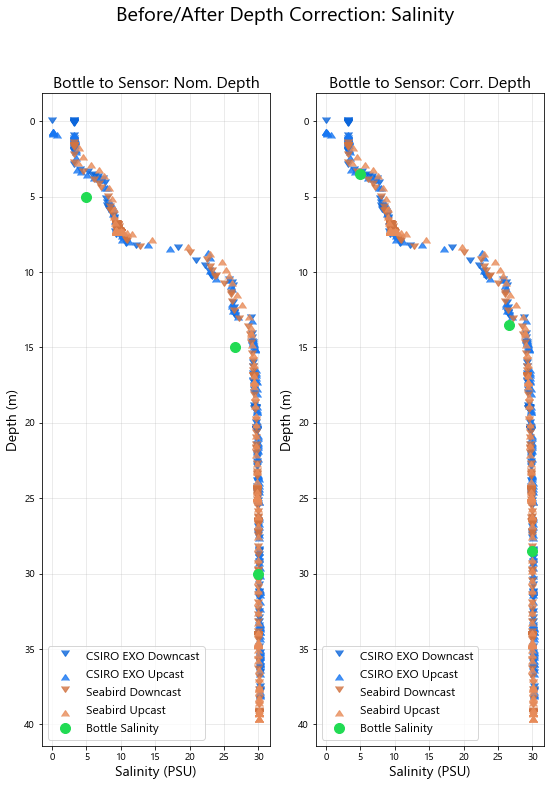

In [118]:
fig = plt.figure()
fig.suptitle("Before/After Depth Correction: Salinity", fontsize=20)
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    ax.plot(csiro_exo_191211['SAL_PSU'].loc[csiro_exo_191211['stage']=='downcast'], 
         csiro_exo_191211['Depth'].loc[csiro_exo_191211['stage']=='downcast'], 
         lw=0, marker=7, alpha=0.8, label = 'CSIRO EXO Downcast', color='#0b66db', ms=8)

    ax.plot(csiro_exo_191211['SAL_PSU'].loc[csiro_exo_191211['stage']=='upcast'], 
             csiro_exo_191211['Depth'].loc[csiro_exo_191211['stage']=='upcast'], 
             lw=0, marker=6, alpha=0.8, label='CSIRO EXO Upcast', color='#1877f2', ms=8)

    ax.plot(seabird_sensor_191210['SAL_PSU'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='downcast')], 
             seabird_sensor_191210['Depth'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='downcast')],
             lw=0, marker=7, alpha=0.8, label = 'Seabird Downcast', color='#d17341', ms=8)

    ax.plot(seabird_sensor_191210['SAL_PSU'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='upcast')], 
             seabird_sensor_191210['Depth'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='upcast')],
             lw=0, marker=6, alpha=0.8, label = 'Seabird Upcast', color='#e88c5a', ms=8)

    #plt.plot(bottle_oxygen['Salinity'], bottle_oxygen['Depth'], lw=0, marker='o', label='ml/L Bottle Oxygen', color='#f54257', ms=10)
    if i == 0:
        ax.plot(bottle_oxygen['Salinity'], bottle_oxygen['Depth'], lw=0, marker='o', label='Bottle Salinity', color='#21db53', ms=10)
        plt.title('Bottle to Sensor: Nom. Depth', fontsize=16)
    else:
        ax.plot(bottle_oxygen['Salinity'], bottle_oxygen['corr_Depth'], lw=0, marker='o', label='Bottle Salinity', color='#21db53', ms=10)
        plt.title('Bottle to Sensor: Corr. Depth', fontsize=16)

    plt.grid(alpha=0.3, zorder=-1)
    plt.gca().invert_yaxis()
    plt.legend(fontsize=12)
    plt.xlabel('Salinity (PSU)', fontsize=14)
    plt.ylabel('Depth (m)', fontsize=14)


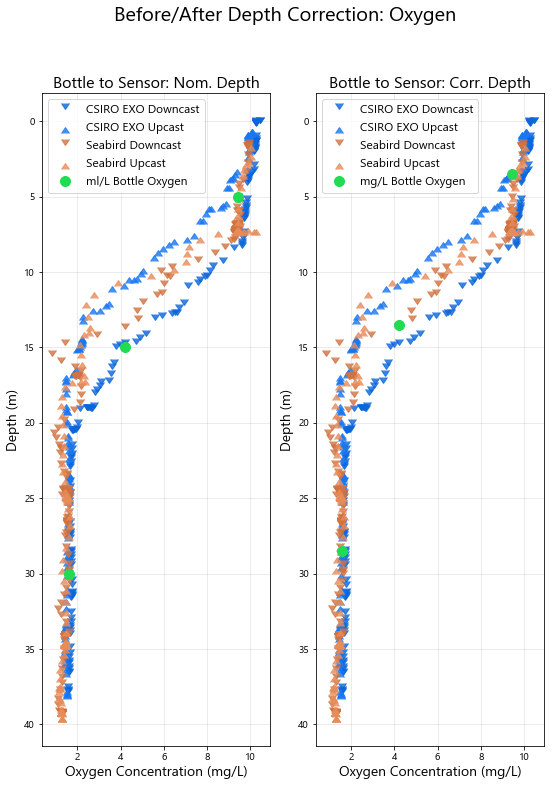

In [117]:
fig = plt.figure()
fig.suptitle("Before/After Depth Correction: Oxygen", fontsize=20)
for i in range(2):
    ax = fig.add_subplot(1,2,i+1)
    ax.plot(csiro_exo_191211['DO_mg/L'].loc[csiro_exo_191211['stage']=='downcast'], 
         csiro_exo_191211['Depth'].loc[csiro_exo_191211['stage']=='downcast'], 
         lw=0, marker=7, alpha=0.8, label = 'CSIRO EXO Downcast', color='#0b66db', ms=8)

    ax.plot(csiro_exo_191211['DO_mg/L'].loc[csiro_exo_191211['stage']=='upcast'], 
             csiro_exo_191211['Depth'].loc[csiro_exo_191211['stage']=='upcast'], 
             lw=0, marker=6, alpha=0.8, label='CSIRO EXO Upcast', color='#1877f2', ms=8)

    ax.plot(seabird_sensor_191210['DO_mg/L'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='downcast')], 
             seabird_sensor_191210['Depth'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='downcast')],
             lw=0, marker=7, alpha=0.8, label = 'Seabird Downcast', color='#d17341', ms=8)

    ax.plot(seabird_sensor_191210['DO_mg/L'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='upcast')], 
             seabird_sensor_191210['Depth'].loc[(seabird_sensor_191210['Depth'] > 1.15) & (seabird_sensor_191210['stage'] =='upcast')],
             lw=0, marker=6, alpha=0.8, label = 'Seabird Upcast', color='#e88c5a', ms=8)

    if i == 0:
        ax.plot(bottle_oxygen['O2mg/L'], bottle_oxygen['Depth'], lw=0, marker='o', label='ml/L Bottle Oxygen', color='#21db53', ms=10)
        plt.title('Bottle to Sensor: Nom. Depth', fontsize=16)
    else:
        ax.plot(bottle_oxygen['O2mg/L'], bottle_oxygen['corr_Depth'], lw=0, marker='o', label='mg/L Bottle Oxygen', color='#21db53', ms=10)
        plt.title('Bottle to Sensor: Corr. Depth', fontsize=16)


    plt.grid(alpha=0.3, zorder=-1)
    plt.gca().invert_yaxis()
    plt.legend(fontsize=12)
    plt.xlabel('Oxygen Concentration (mg/L)', fontsize=14)
    plt.ylabel('Depth (m)', fontsize=14)
    #plt.savefig('C:/Users/she384/Downloads/plot_for_ruth.png', dpi=300)

## Sort of better - need to look at other parameters to get a gauge on the ACTUAL depth that was sampled with the niskins